# **Data Preprocessing - Before Building Machine Learning Model**
---
---

This notebook performs a complete data preprocessing pipeline for predicting Body Mass Index (BMI) from metagenomic features (microbial abundances) and metadata.

Before training machine learning models, it's essential to clean and prepare the data properly to improve model accuracy, stability, and generalization. This notebook includes data loading, inspection, exploratory analysis, encoding, scaling, and exporting of cleaned datasets.


Below is a brief overview of the preprocessing steps:

#### **STEPS:**
1. Import necessary libraries
2. Read datasets 
3. Sanity check of data
4. Exploratory data analysis (EDA)
5. Missing values treatments 
6. Outliers treatments
7. Duplicates and garbage values treatments
8. Normalization / Scaling
9. Encoding of data
10. Visualization
11. Export final datasets

---
---

### **STEP 1:**
We import essential libraries for data manipulation, visualization and preprocessing.

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import umap.umap_ as umap
from matplotlib import cm
import matplotlib.pyplot as plt 
from IPython.display import display
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

### **STEP 2:**
We load the development and validation datasets which contain gut microbiome profiles and patient metadata.

In [12]:
dev_df = pd.read_csv('~/Assignment-1/data/assignment1_dev_set.csv')
val_df = pd.read_csv('~/Assignment-1/data/assignment1_val_set.csv')

# head
print("--------------\n", "Development Set", "\n--------------")
display(dev_df.head())

print('--------------\n')
# tail
display(dev_df.tail())

print("--------------\n", "Validation Set", "\n--------------")
display(val_df.head())
print('--------------\n')
# tail
display(val_df.tail())

--------------
 Development Set 
--------------


,Unnamed: 0,Project ID,Experiment type,Sex,Host age,BMI,Disease MESH ID,Acholeplasma axanthum,Acidaminococcus fermentans,Acidaminococcus intestini,...,Clostridium sphenoides,Clostridium spiroforme,Clostridium stercorarium,Clostridium symbiosum,Clostridium thermosuccinogenes,Clostridium xylanolyticum,Eubacterium brachy,Eubacterium dolichum,Eubacterium sulci,Ruminococcus gnavus
0,0,PRJEB11419,Metagenomics,Male,53.0,19.01,D006262,0.000000,0.000000,0.000000,...,0.005891,0.029457,0.000000,0.000000,0.002946,0.000000,0.000000,0.000000,0.002946,0.100153
1,1,PRJNA388263,Metagenomics,Female,21.0,23.50,D006262,0.001028,0.000000,0.000000,...,0.000000,0.002569,0.412652,0.003083,0.000000,0.000000,0.008736,0.014903,0.077597,0.004625
2,2,PRJNA388263,Metagenomics,Male,52.0,25.80,D006262,0.001406,0.000000,0.000000,...,0.000000,0.005624,0.002812,0.007031,0.000000,0.000000,0.000000,0.000000,0.005624,0.016873
3,3,PRJEB11419,Metagenomics,Female,40.0,23.49,D006262,0.000000,0.008825,0.273562,...,0.017649,0.198553,0.000000,0.158842,0.030886,0.101483,0.000000,0.000000,0.000000,0.000000
4,4,PRJEB11419,Metagenomics,Female,30.0,22.60,D006262,0.002878,0.037419,7.359970,...,0.305106,0.135283,0.000000,0.051811,0.054689,0.083473,0.020148,0.000000,0.054689,0.011513


--------------



,Unnamed: 0,Project ID,Experiment type,Sex,Host age,BMI,Disease MESH ID,Acholeplasma axanthum,Acidaminococcus fermentans,Acidaminococcus intestini,...,Clostridium sphenoides,Clostridium spiroforme,Clostridium stercorarium,Clostridium symbiosum,Clostridium thermosuccinogenes,Clostridium xylanolyticum,Eubacterium brachy,Eubacterium dolichum,Eubacterium sulci,Ruminococcus gnavus
484,484,PRJNA397219,Metagenomics,Male,60.0,24.97,D006262,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002160,0.000000,0.000000
485,485,PRJNA388263,Metagenomics,Male,52.0,25.80,D006262,0.000000,0.000000,0.000000,...,0.000000,0.017105,0.001770,0.032834,0.000000,0.000590,0.000393,0.000000,0.000197,0.004522
486,486,PRJNA397219,Metagenomics,Male,78.0,29.53,D006262,0.000000,0.000000,0.000000,...,0.000000,0.309092,0.052094,0.197958,0.000000,0.006946,0.000000,0.017365,0.065986,0.000000
487,487,PRJEB11419,Metagenomics,Male,43.0,25.55,D006262,0.001556,0.001556,0.122888,...,0.017111,0.057555,0.000000,0.054444,0.000000,0.045111,0.010889,0.000000,0.009333,0.018667
488,488,PRJNA485797,Metagenomics,Female,51.0,22.59,D006262,0.000000,0.011382,7.660350,...,0.045530,0.017074,0.000000,0.045530,0.079677,0.000000,0.000000,0.000000,0.073985,0.153662


--------------
 Validation Set 
--------------


,Unnamed: 0,Project ID,Experiment type,Sex,Host age,BMI,Disease MESH ID,Acholeplasma axanthum,Acidaminococcus fermentans,Acidaminococcus intestini,...,Clostridium sphenoides,Clostridium spiroforme,Clostridium stercorarium,Clostridium symbiosum,Clostridium thermosuccinogenes,Clostridium xylanolyticum,Eubacterium brachy,Eubacterium dolichum,Eubacterium sulci,Ruminococcus gnavus
0,0,PRJEB11419,Metagenomics,Male,60.0,25.71,D006262,0.0,0.000000,1.621960,...,0.000000,2.871240,0.0,0.068238,0.115479,0.015747,0.010498,0.000000,0.010498,0.551152
1,1,PRJNA379979,Metagenomics,Male,57.0,27.20,D006262,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2,PRJEB11419,Metagenomics,Male,65.0,22.35,D006262,0.0,0.002095,0.000000,...,0.000000,0.064936,0.0,0.016758,0.000000,0.041895,0.010474,0.006284,0.014663,0.000000
3,3,PRJEB11419,Metagenomics,Male,55.0,25.52,D006262,0.0,0.000000,0.044998,...,0.003461,0.089996,0.0,0.003461,0.006923,0.000000,0.000000,0.020768,0.034614,0.013846
4,4,PRJNA379979,Metagenomics,Female,54.0,21.60,D006262,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


--------------



,Unnamed: 0,Project ID,Experiment type,Sex,Host age,BMI,Disease MESH ID,Acholeplasma axanthum,Acidaminococcus fermentans,Acidaminococcus intestini,...,Clostridium sphenoides,Clostridium spiroforme,Clostridium stercorarium,Clostridium symbiosum,Clostridium thermosuccinogenes,Clostridium xylanolyticum,Eubacterium brachy,Eubacterium dolichum,Eubacterium sulci,Ruminococcus gnavus
206,206,PRJEB11419,Metagenomics,Female,51.0,22.67,D006262,0.0,0.0,0.692094,...,0.010104,0.383935,0.000000,0.070725,0.0,0.045466,0.000000,0.000000,0.000000,0.015155
207,207,PRJNA379979,Metagenomics,Male,54.0,25.60,D006262,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
208,208,PRJNA388263,Metagenomics,Male,52.0,25.80,D006262,0.0,0.0,0.000000,...,0.000000,0.023239,0.001452,0.015977,0.0,0.000000,0.001452,0.000000,0.013072,0.015977
209,209,PRJEB11419,Metagenomics,Male,26.0,26.54,D006262,0.0,0.0,0.015966,...,0.005322,0.564130,0.000000,0.015966,0.0,0.074508,0.000000,0.000000,0.000000,0.021288
210,210,PRJEB11419,Metagenomics,Female,19.0,22.86,D006262,0.0,0.0,0.000000,...,0.000000,0.125413,0.000000,0.197621,0.0,0.003800,0.003800,0.030403,0.000000,0.543458


In [13]:
# Drop unnamed columns (leftover indices from CSV)
dev_df = dev_df.loc[:, ~dev_df.columns.str.contains("^Unnamed")]
eval_df = val_df.loc[:, ~val_df.columns.str.contains("^Unnamed")]

### **STEP 3:**
Sanity Check.
We check dimensions, data types and null values and also look for duplicate and garbage values to understand data integrity.

In [14]:
#shape
print("Development Set Shape: ", dev_df.shape)
print("Validation Set Shape: ", val_df.shape)


#info
print("\nDevelopment Set Info:")
dev_df.info()
print("\nValidation Set Info:")
val_df.info()
print("\n")

#finding missing values
print("Development Set Missing Values:", dev_df.isnull().sum())
print("Validation Set Missing Values:", val_df.isnull().sum())
print("\n")

#checking for duplicates
print("Development Set Duplicates: ", dev_df.duplicated().sum())
print("Validation Set Duplicates: ", val_df.duplicated().sum())

Development Set Shape:  (489, 140)
Validation Set Shape:  (211, 141)

Development Set Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Columns: 140 entries, Project ID to Ruminococcus gnavus
dtypes: float64(136), object(4)
memory usage: 535.0+ KB

Validation Set Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Columns: 141 entries, Unnamed: 0 to Ruminococcus gnavus
dtypes: float64(136), int64(1), object(4)
memory usage: 232.6+ KB


Development Set Missing Values: Project ID                   0
Experiment type              0
Sex                          0
Host age                     0
BMI                          0
                            ..
Clostridium xylanolyticum    0
Eubacterium brachy           0
Eubacterium dolichum         0
Eubacterium sulci            0
Ruminococcus gnavus          0
Length: 140, dtype: int64
Validation Set Missing Values: Unnamed: 0                   0
Project ID                   0
Experiment typ

In [15]:
#identifying garbage values in object columns
print("Development Set Garbage Values:")
for col in dev_df.select_dtypes(include='object').columns:
    print(f"Unique values in {col}: {dev_df[col].value_counts()}")
    print("\n")

print("Validation Set Garbage Values:")
for col in val_df.select_dtypes(include='object').columns:
    print(f"Unique values in {col}: {val_df[col].value_counts()}")
    print("\n")

Development Set Garbage Values:
Unique values in Project ID: Project ID
PRJEB11419     271
PRJNA388263    156
PRJNA397219     23
PRJNA379979     17
PRJNA485797     14
PRJNA428202      8
Name: count, dtype: int64


Unique values in Experiment type: Experiment type
Metagenomics    489
Name: count, dtype: int64


Unique values in Sex: Sex
Male      302
Female    187
Name: count, dtype: int64


Unique values in Disease MESH ID: Disease MESH ID
D006262    489
Name: count, dtype: int64


Validation Set Garbage Values:
Unique values in Project ID: Project ID
PRJEB11419     124
PRJNA388263     68
PRJNA379979     11
PRJNA397219      4
PRJNA485797      4
Name: count, dtype: int64


Unique values in Experiment type: Experiment type
Metagenomics    211
Name: count, dtype: int64


Unique values in Sex: Sex
Male      142
Female     69
Name: count, dtype: int64


Unique values in Disease MESH ID: Disease MESH ID
D006262    211
Name: count, dtype: int64




In [16]:
# Check for unusual patterns in numeric columns (without printing cause the output is too long)
# We store summary stats so we could log them if needed
negative_values_dev = {}
for col in dev_df.select_dtypes(include='number').columns:
    negative_entries = dev_df[dev_df[col] < 0][col]
    if not negative_entries.empty:
        negative_values_dev[col] = negative_entries
print("Negative values in Development Set:")
print(negative_values_dev.keys())

negative_values_val = {}
for col in val_df.select_dtypes(include='number').columns:
    negative_entries = val_df[val_df[col] < 0][col]
    if not negative_entries.empty:
        negative_values_val[col] = negative_entries
print("Negative values in Validation Set:")
print(negative_values_val.keys())


Negative values in Development Set:
dict_keys([])
Negative values in Validation Set:
dict_keys([])


### **STEP 4:**
EDA - Exploratory Data Analysis
- Identification of Outliers
- Correlation Analysis & Heatmap


In [17]:
#In this step we will drop the metadata columns and we will keep only the features and target columns
# Drop metadata columns
metadata_columns = ["Project ID", "Experiment type", "Host age", "Sex", "Disease MESH ID"]
dev_df = dev_df.drop(columns=metadata_columns)
val_df = val_df.drop(columns=metadata_columns)

print("Summary Statistics of Development Set:\n", dev_df.describe().T)
print("Summary Statistics of Validation Set:\n", val_df.describe().T)

Summary Statistics of Development Set:
                             count       mean       std    min    25%  \
BMI                         489.0  24.939550  4.207710  16.97  22.38   
Acholeplasma axanthum       489.0   0.016818  0.145035   0.00   0.00   
Acidaminococcus fermentans  489.0   0.029968  0.197816   0.00   0.00   
Acidaminococcus intestini   489.0   0.294917  0.804704   0.00   0.00   
Actinomyces lingnae         489.0   0.001608  0.010431   0.00   0.00   
...                           ...        ...       ...    ...    ...   
Clostridium xylanolyticum   489.0   0.038531  0.122225   0.00   0.00   
Eubacterium brachy          489.0   0.006565  0.018357   0.00   0.00   
Eubacterium dolichum        489.0   0.012565  0.097056   0.00   0.00   
Eubacterium sulci           489.0   0.041855  0.181979   0.00   0.00   
Ruminococcus gnavus         489.0   0.091976  0.416085   0.00   0.00   

                                  50%        75%        max  
BMI                         25.10

In [18]:
# Define a function to calculate whisker bounds for IQR outlier detection
def whisker(col):
    q1, q3 = np.percentile(col, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    return lower_bound, upper_bound

In [19]:
# Detect outliers using IQR method
iqr_outliers_dev = {}
for col in dev_df.select_dtypes(include='number').columns:
    lower, upper = whisker(dev_df[col])
    outliers = dev_df[(dev_df[col] < lower) | (dev_df[col] > upper)][col]
    if not outliers.empty:
        iqr_outliers_dev[col] = outliers
print("Detected outliers (IQR-based):")
for col, values in iqr_outliers_dev.items():
    print(f"{col}: {len(values)} outliers")


iqr_outliers_val = {}
for col in val_df.select_dtypes(include='number').columns:
    lower, upper = whisker(val_df[col])
    outliers = val_df[(val_df[col] < lower) | (val_df[col] > upper)][col]
    if not outliers.empty:
        iqr_outliers_val[col] = outliers

print("Detected outliers (IQR-based):")
for col, values in iqr_outliers_val.items():
    print(f"{col}: {len(values)} outliers")

Detected outliers (IQR-based):
BMI: 31 outliers
Acholeplasma axanthum: 84 outliers
Acidaminococcus fermentans: 98 outliers
Acidaminococcus intestini: 97 outliers
Actinomyces lingnae: 102 outliers
Akkermansia muciniphila: 80 outliers
Alistipes finegoldii: 62 outliers
Alistipes indistinctus: 70 outliers
Alistipes obesi: 62 outliers
Alistipes onderdonkii: 59 outliers
Alistipes putredinis: 38 outliers
Alistipes shahii: 52 outliers
Alistipes sp. RMA 9912: 106 outliers
Alistipes timonensis: 58 outliers
Anaerofilum pentosovorans: 60 outliers
Anaerofustis stercorihominis: 119 outliers
Anaerostipes butyraticus: 55 outliers
Anaerostipes caccae: 63 outliers
Anaerotruncus colihominis: 46 outliers
Bacillus megaterium: 48 outliers
Bacillus nealsonii: 60 outliers
Bacteroides eggerthii: 94 outliers
Bacteroides fragilis: 69 outliers
Bacteroides gallinarum: 56 outliers
Bacteroides graminisolvens: 115 outliers
Bacteroides intestinalis: 66 outliers
Bacteroides massiliensis: 72 outliers
Bacteroides ovatus:

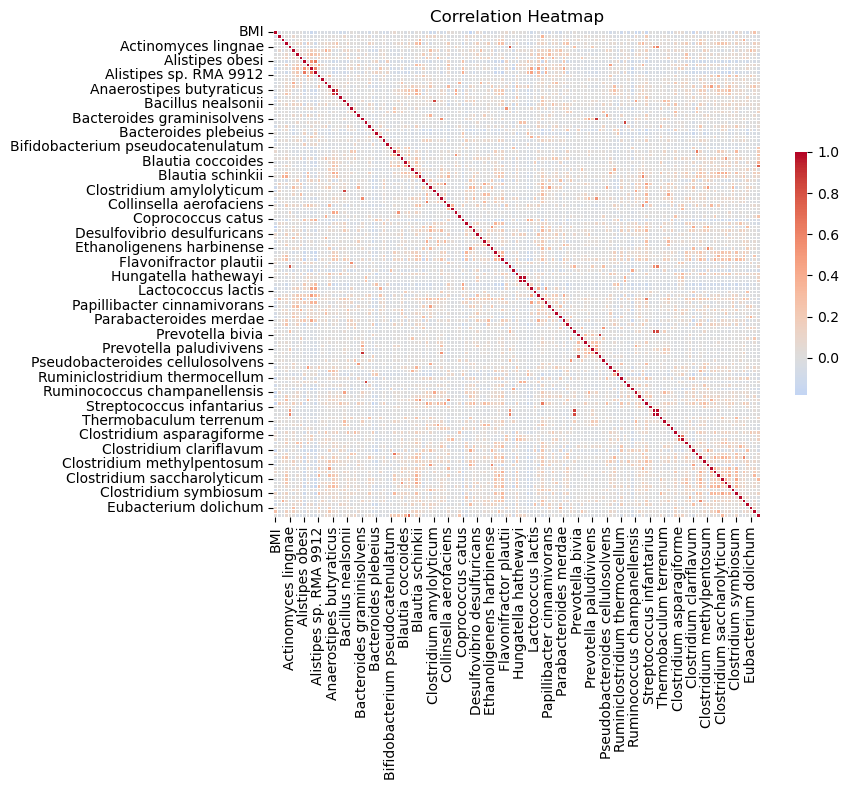

In [20]:
#Correlation heatmap of numerical features
cor_matrix = dev_df.select_dtypes(include='number').corr()
plt.figure(figsize=(10, 8))
sns.heatmap(cor_matrix, cmap="coolwarm", center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

In [21]:
# Top features most correlated with BMI
bmi_corr = cor_matrix["BMI"].drop("BMI").sort_values(key=abs, ascending=False)
print("Top features correlated with BMI:")
for feature, corr in bmi_corr.head(10).items():
    print(f"{feature}: {corr:.4f}")

Top features correlated with BMI:
Eubacterium sulci: 0.2682
Desulfonispora thiosulfatigenes: -0.1803
Sporobacter termitidis: -0.1451
Clostridium clariflavum: -0.1400
Alistipes putredinis: -0.1385
Ruminococcus champanellensis: -0.1301
Clostridium symbiosum: 0.1258
Ruminiclostridium thermocellum: -0.1257
Christensenella minuta: -0.1196
Clostridium stercorarium: -0.1145


### **STEP 5:**
Missing value treatment.

In [22]:
# Apply KNN imputer only to feature columns (features_dev/val)

# Assuming 'BMI' is the target variable and should not be imputed
# Isolate feature columns (all columns after 'Disease MESH ID')
feature_columns = dev_df.columns[dev_df.columns != 'BMI']
features_dev = dev_df[feature_columns]
features_val = val_df[feature_columns]

# Initialize KNN imputer
impute = KNNImputer()

# Impute numeric values
dev_df[feature_columns] = impute.fit_transform(features_dev)
val_df[feature_columns] = impute.transform(features_val)

### **STEP 6:** 
Instead of removing IQR-based outliers, we apply a `log1p` transformation to all features.
Justification:
- A large number of outliers were detected across many features.
- Removing them would cause substantial data loss.
- Microbiome data is known to be highly skewed, with many zeros and rare large values.
- log1p(x) = log(1 + x) compresses large values, smooths skewed distributions, and retains all samples.

In [23]:
for col in feature_columns:
    dev_df[col] = np.log1p(dev_df[col])
    val_df[col] = np.log1p(val_df[col])

### **STEP 7:**
Drop duplicates or gargabe rows. 
As confirmed in the earlier sanity checks, there are no duplicate or invalid rows in the dataset. Therefore, no rows need to be removed at this stage.

### **STEP 8:**
Normalization / Scaling.
Although `log1p` transformation reduces skewness and stabilizes feature variance, we still apply `StandardScaler` to center the data (mean=0) and scale it (std=1).

Justification:
- Many ML models (SVM, KNN, SVR, ElasticNet) are sensitive to feature scale.
- Even after log, features may differ in range and variance.
- Scaling ensures fair contribution of all features and better optimization convergence.

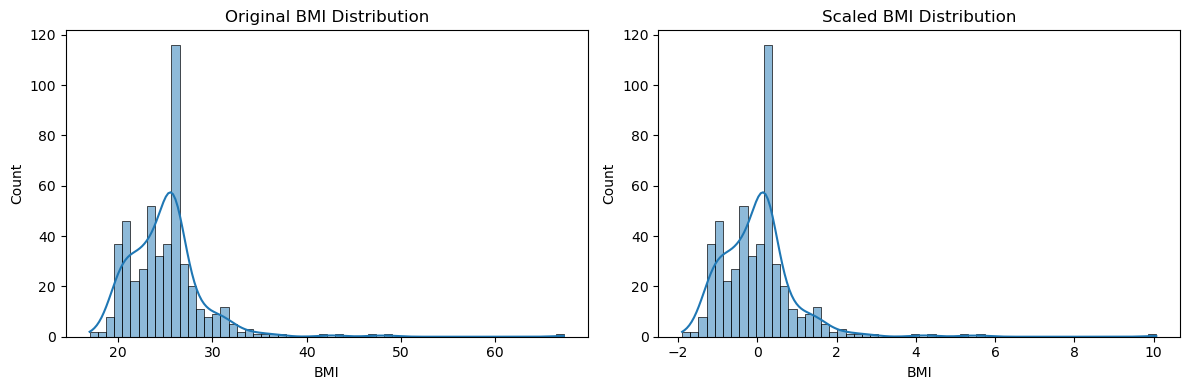

In [ ]:
# Scale the feature columns using StandardScaler
scaler = StandardScaler()
scaled_dev = pd.DataFrame(scaler.fit_transform(dev_df[feature_columns]), columns=feature_columns)
scaled_val = pd.DataFrame(scaler.transform(val_df[feature_columns]), columns=feature_columns)

# Add the scaled BMI column back to the scaled DataFrame for plotting
scaled_dev["BMI"] = scaler.fit_transform(dev_df[["BMI"]])
scaled_val["BMI"] = scaler.transform(val_df[["BMI"]])

# Plot the original and scaled BMI distributions
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(dev_df["BMI"], kde=True, ax=axs[0])
axs[0].set_title("Original BMI Distribution")
sns.histplot(scaled_dev["BMI"], kde=True, ax=axs[1])
axs[1].set_title("Scaled BMI Distribution")
plt.tight_layout()
plt.show()

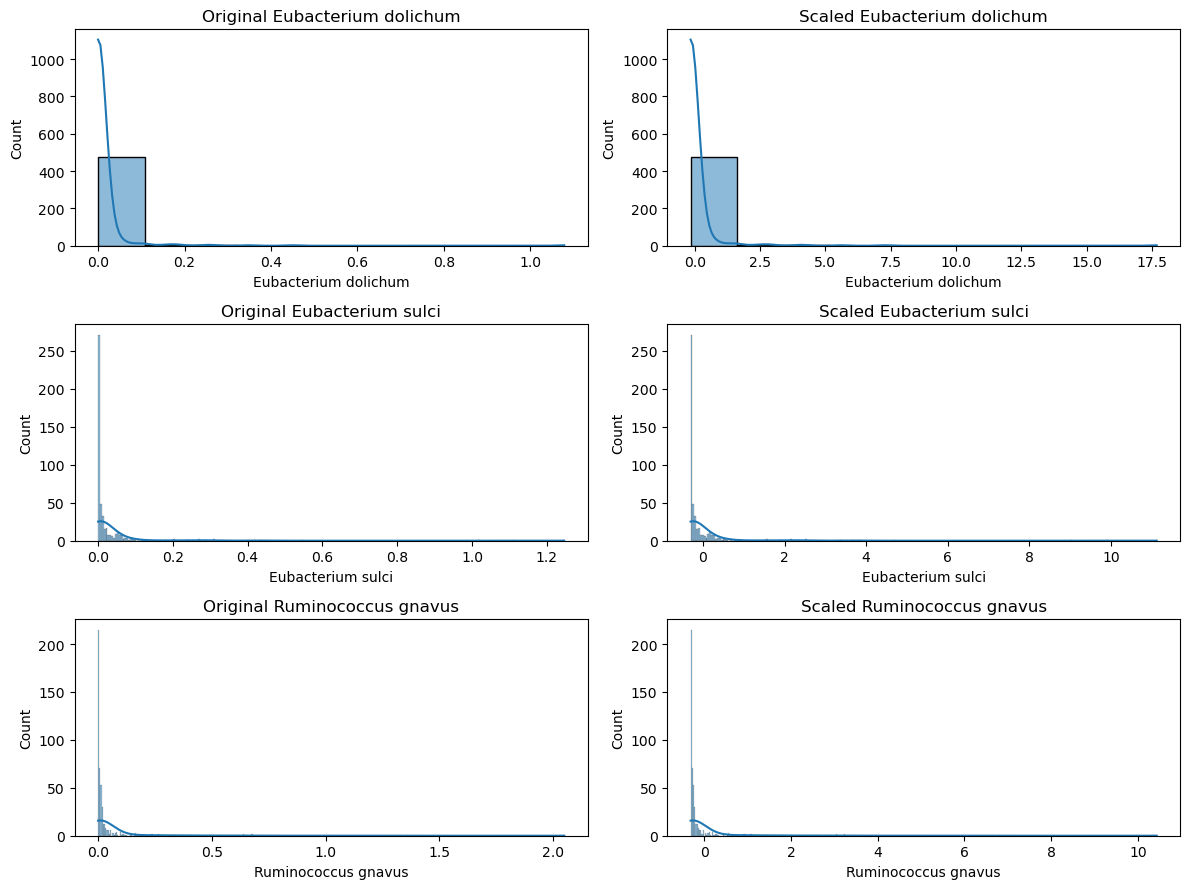

In [25]:
# Select the last 3 features from feature_columns for visualization
sample_features = feature_columns[-3:]

# Create subplots for original and scaled distributions
fig, axs = plt.subplots(3, 2, figsize=(12, 9))

for i, feature in enumerate(sample_features):
    # Plot original feature distribution
    sns.histplot(dev_df[feature], kde=True, ax=axs[i][0])
    axs[i][0].set_title(f"Original {feature}")
    
    # Plot scaled feature distribution
    sns.histplot(scaled_dev[feature], kde=True, ax=axs[i][1])
    axs[i][1].set_title(f"Scaled {feature}")

plt.tight_layout()
plt.show()

### **STEP 9:**
Encoding of categorical variables.

Although the dataset includes several categorical metadata columns (such as "Sex", "Project ID", and "Disease MESH ID"), these were excluded from the training data based on the scope of the assignment, which explicitly focuses on predicting BMI using microbial composition features only. Encoding would only be necessary if these categorical variables were used as inputs to machine learning models. 

### **STEP 10:**
Visualization of data.


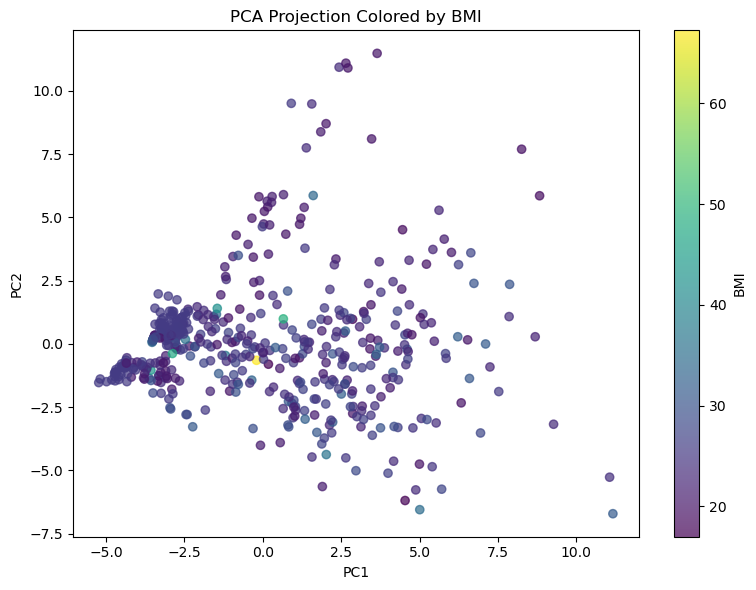

In [26]:
# Apply PCA on scaled features
pca = PCA(n_components=2)
pca_proj = pca.fit_transform(scaled_dev)

# Plot with BMI as color gradient
plt.figure(figsize=(8, 6))
scatter = plt.scatter(pca_proj[:, 0], pca_proj[:, 1],
                      c=dev_df["BMI"], cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label="BMI")
plt.title("PCA Projection Colored by BMI")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.tight_layout()
plt.show()


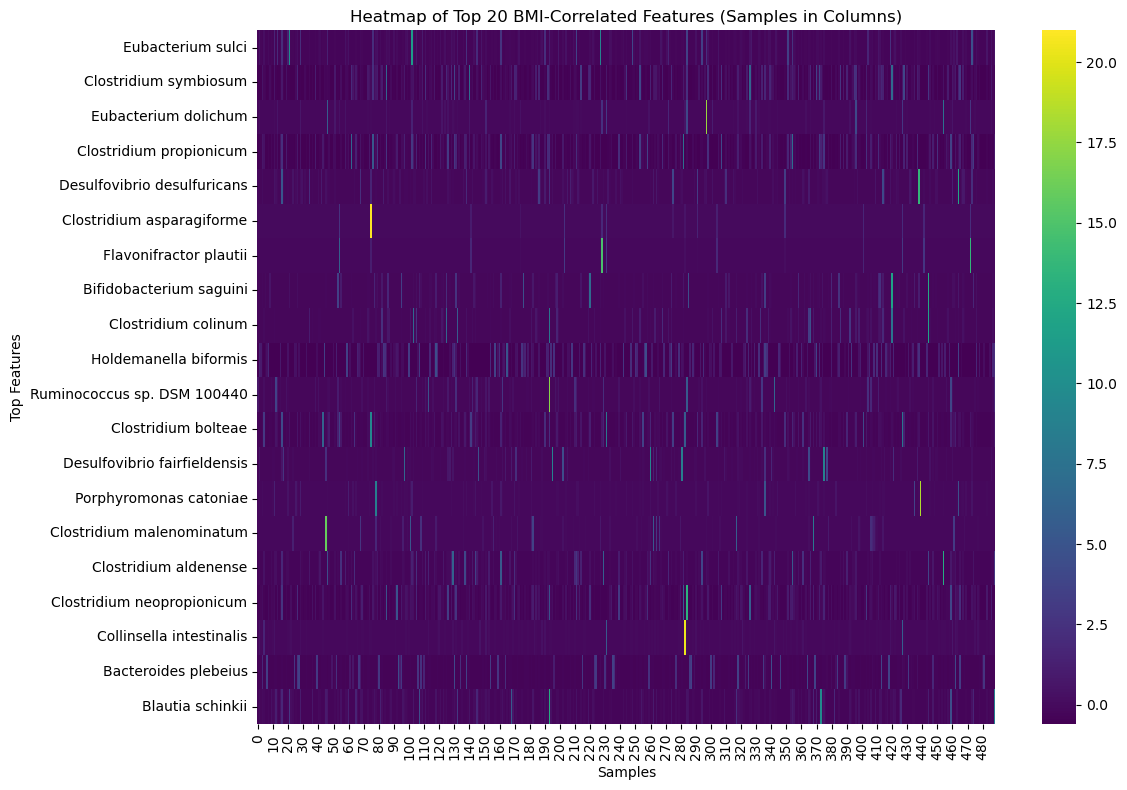

In [27]:
# Ensure bmi_corr is computed as the correlation of BMI with other features
bmi_corr = scaled_dev.corr()["BMI"].sort_values(ascending=False)

# Select the top 20 features most correlated with BMI (excluding BMI itself)
top_features = bmi_corr.drop("BMI").head(20).index.tolist()

# Plot the heatmap of the top 20 BMI-correlated features
plt.figure(figsize=(12, 8))
sns.heatmap(scaled_dev[top_features].transpose(), cmap="viridis", cbar=True)
plt.title("Heatmap of Top 20 BMI-Correlated Features (Samples in Columns)")
plt.xlabel("Samples")
plt.ylabel("Top Features")
plt.tight_layout()
plt.show()


Top 10 features contributing to PC1:
Faecalibacterium sp. MC_41     0.228279
Oscillibacter valericigenes    0.214788
Clostridium indolis            0.191109
Sporobacter termitidis         0.176663
Blautia glucerasea             0.169064
Clostridium saccharolyticum    0.158000
Clostridium sphenoides         0.157335
Clostridium leptum             0.156300
Blautia producta               0.156222
Clostridium spiroforme         0.149005
Name: PC1, dtype: float64


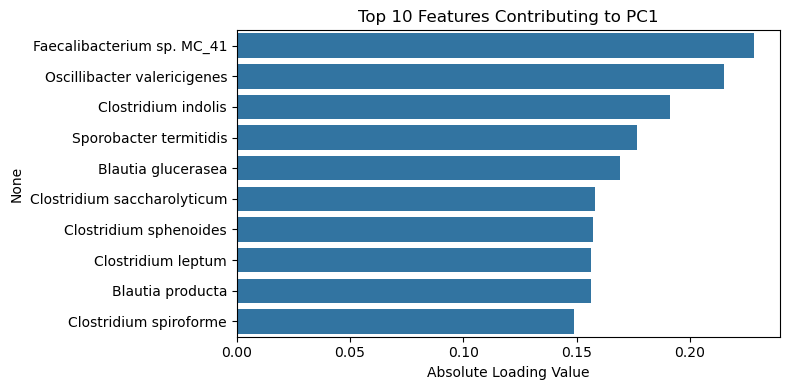

In [28]:
# Create DataFrame with loadings (contribution of each feature to PCs)
loadings = pd.DataFrame(pca.components_.T,
                        columns=["PC1", "PC2"],
                        index=scaled_dev.columns)

# Get top 10 absolute contributors to PC1
top_pc1 = loadings["PC1"].abs().sort_values(ascending=False).head(10)
print("Top 10 features contributing to PC1:")
print(top_pc1)

# Barplot of those contributions
plt.figure(figsize=(8, 4))
sns.barplot(x=top_pc1.values, y=top_pc1.index)
plt.title("Top 10 Features Contributing to PC1")
plt.xlabel("Absolute Loading Value")
plt.tight_layout()
plt.show()


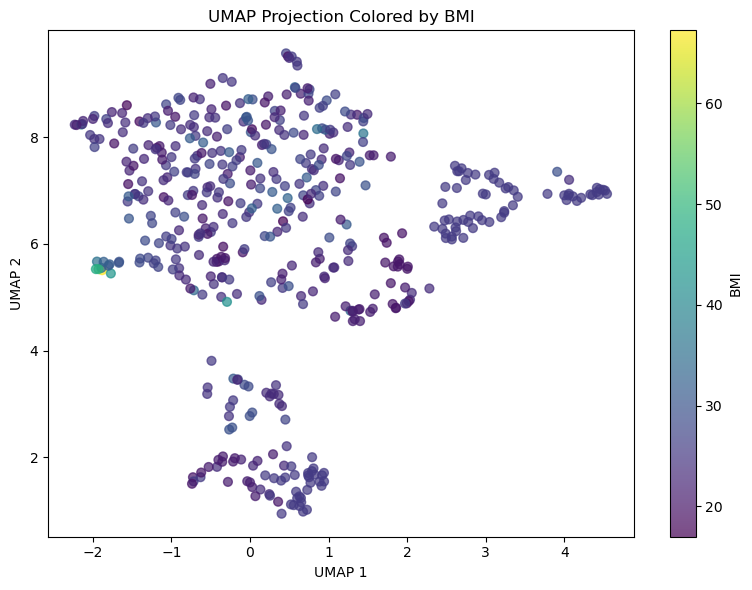

In [29]:
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, metric='euclidean')
embedding = reducer.fit_transform(scaled_dev)

plt.figure(figsize=(8, 6))
plt.scatter(embedding[:, 0], embedding[:, 1], c=dev_df["BMI"], cmap='viridis', s=40, alpha=0.7)
plt.colorbar(label="BMI")
plt.title("UMAP Projection Colored by BMI")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.tight_layout()
plt.show()


### **STEP 11:**
Data exportation. 

In [30]:
scaled_dev.to_csv("~/Assignment-1/data/development_final_data.csv", index=False)
scaled_val.to_csv("~/Assignment-1/data/evaluation_final_data.csv", index=False)
print("Preprocessing is completed and the final datasets are saved.")

Preprocessing is completed and the final datasets are saved.
